<h1>Linear Regression:</h1>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


<p>1. Generate 2000 data points with one dimensional feature randomly sampled. For each data point attribute a real number representing its target value.</p>


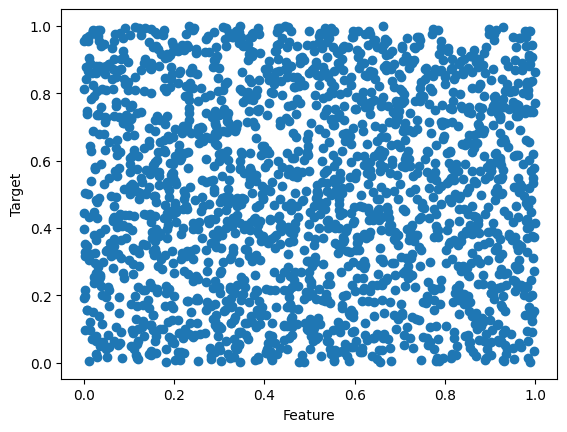

In [ ]:
n_samples = 2000
x = np.random.rand(n_samples,1)
y = np.random.rand(n_samples,1)
plt.scatter(x, y)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

<p>2. Fit a line using the data points and their target values using two different methods</p>

**Method 1 : Linear Regression**

In [ ]:
x_with_bias = np.c_[np.ones((n_samples,1)),x]
theta_linear=np.linalg.inv(x_with_bias.T.dot(x_with_bias)).dot(x_with_bias.T).dot(y)
linear_predictions=x_with_bias.dot(theta_linear)


**Method 2: Polynomial Regression(degree=2)**

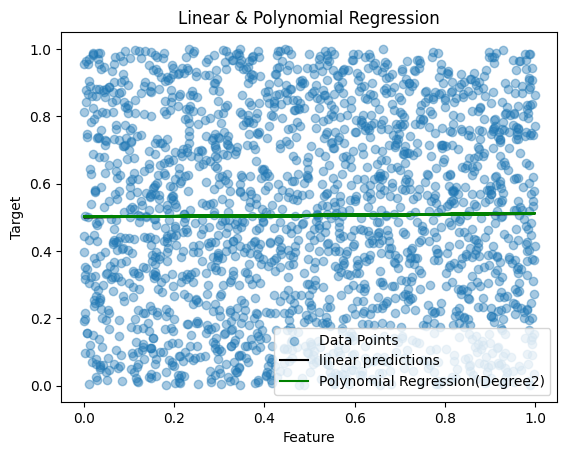

In [ ]:
degree=2
x_poly = np.c_[np.ones((n_samples,1)),x,x**2]
theta_poly=np.linalg.inv(x_poly.T.dot(x_poly)).dot(x_poly.T).dot(y)
poly_predictions=x_poly.dot(theta_poly)

plt.scatter(x,y,label='Data Points', alpha=0.4)
plt.plot(x,linear_predictions, label='linear predictions', color='black')
plt.plot(x,poly_predictions, label=f'Polynomial Regression(Degree{degree})', color='green')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear & Polynomial Regression')
plt.legend()
plt.show()

<p>3. Add 20 outlier data points randomly distributed, set them and their target values far away from the original data point</p>


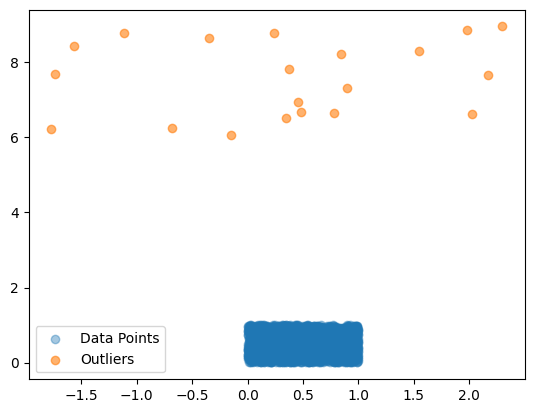

In [ ]:
n_outliers = 20

outlier_x=np.random.rand(n_outliers,1)*6-3
outlier_y=np.random.rand(n_outliers,1)*3+6
plt.scatter(x,y,label='Data Points', alpha=0.4)
plt.scatter(outlier_x,outlier_y,label='Outliers', alpha=0.6)
plt.legend()
plt.show()



We can observe that outliers and their target are away form our original data points and they are randomly distrbuted

<p>4. Fit a line using all data points using one of the proposed two methods. What do you observe?</p>


In [ ]:
x_new = np.concatenate((x,outlier_x), axis=0)
y_new = np.concatenate((y,outlier_y), axis=0)

Using Method 1 : Linear Regression

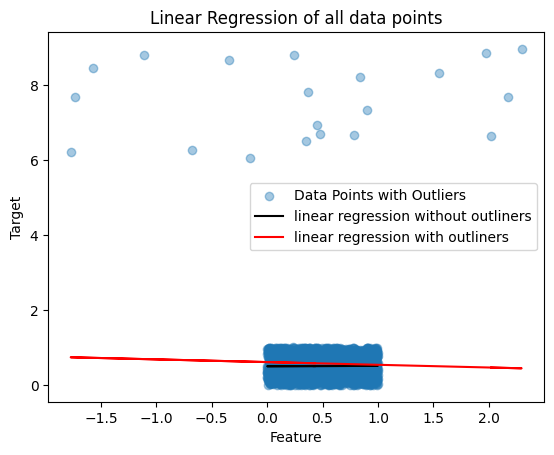

In [ ]:
x_new_with_bias = np.c_[np.ones((n_samples + n_outliers,1)),x_new]
theta_linear2=np.linalg.inv(x_new_with_bias.T.dot(x_new_with_bias)).dot(x_new_with_bias.T).dot(y_new)
linear_predictions2=x_new_with_bias.dot(theta_linear2)

plt.scatter(x_new,y_new,label='Data Points with Outliers', alpha=0.4)
plt.plot(x,linear_predictions, label='linear regression without outliners', color='black')
plt.plot(x_new,linear_predictions2, label='linear regression with outliners', color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression of all data points')
plt.legend()
plt.show()

We see that from result that linear model with outliners has deviated from the original model in balck and it's due to addition of outliners even the relation is 1 % but it's has an impact on the original model


<p>5. Add a regularisation to the proposed method, use the sum of the square of coefficients. What do you observe?</p>


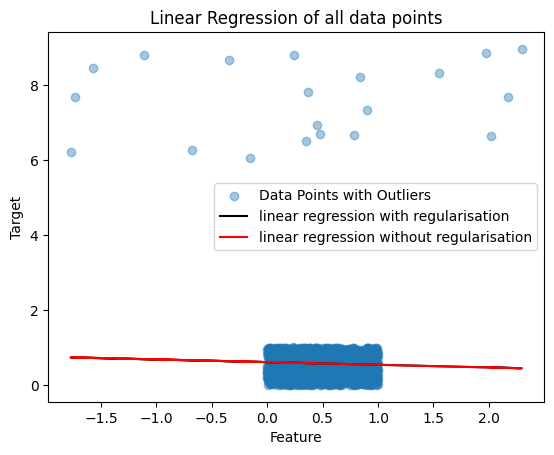

In [ ]:
alpha=0.9
theta_linear_reg=np.linalg.inv(x_new_with_bias.T.dot(x_new_with_bias)+alpha*np.eye(x_new_with_bias.shape[1])).dot(x_new_with_bias.T).dot(y_new)
linear_predictions_reg=x_new_with_bias.dot(theta_linear_reg)

plt.scatter(x_new,y_new,label='Data Points with Outliers', alpha=0.4)
plt.plot(x_new,linear_predictions_reg, label='linear regression with regularisation', color='black')
plt.plot(x_new,linear_predictions2, label='linear regression without regularisation', color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression of all data points')
plt.legend()
plt.show()

wee can see that regularization eliminate overffiting due to the outliners and the slope is corrected by α term and improving the generalization of the model

<p>6. Fit linear model with RANSAC algorithm</p>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


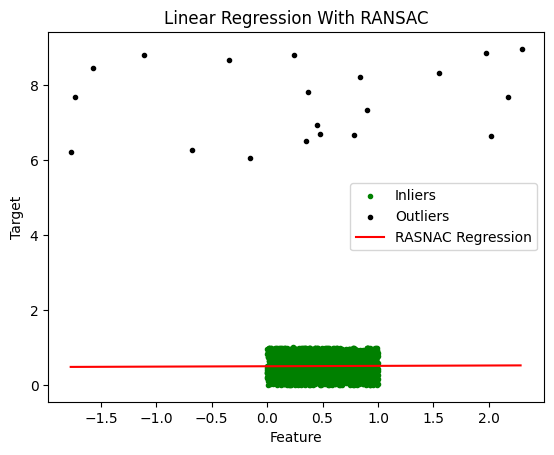

In [ ]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(base_estimator=None, min_samples=100, residual_threshold=1.0,random_state=601)
ransac.fit(x_new, y_new)
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

line_x=np.arange(x_new.min(), x_new.max(), 0.01)[:, np.newaxis]
line_y_ransac = ransac.predict(line_x)


plt.scatter(x_new[inlier_mask],y_new[inlier_mask], color='green', marker='.', label='Inliers')
plt.scatter(x_new[outlier_mask],y_new[outlier_mask], color='black', marker='.', label='Outliers')
plt.plot(line_x, line_y_ransac, color='red', label='RASNAC Regression')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression With RANSAC')
plt.legend()
plt.show()



We can observe that the RASNAC algo splits the training data into two sets



1.   Inliers which are the dtata that the algo use for the regression
2.   Outliers which is considered as noise that algo will ignore for the regression

RASNAC algo is used to estimate parameters of mathematical model from a set of observed data that may contain outliers



<h1>Linear classification</h1>
<p>1. Create an instance of Logistic Regression Classifier and fit the data.</P>


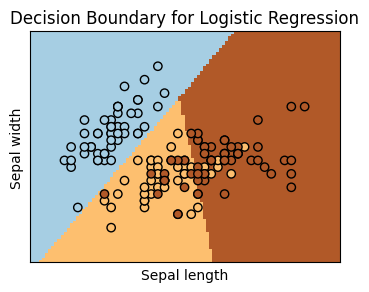

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())
plt.title('Decision Boundary for Logistic Regression')
plt.show()

